<center>
    <h1> Semantic Web</h1>
    <h1> Exercise 4</h1>
</center>

In [1]:
%%capture

import sys
!{sys.executable} -m pip install jupyter-rdfify -U

!conda install --override-channels --yes --prefix {sys.prefix} -c conda-forge python-graphviz

In [2]:
%reload_ext jupyter-rdfify

C:\Users\Sanjida Ivy\AppData\Roaming\Python\Python312\site-packages\rdflib_jsonld\__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.0.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(


In [3]:
# This cell defines some helpers, imports and strings for tests. Run it!
from rdflib import URIRef, BNode, Literal, XSD, RDF, RDFS
ex = "http://example.org/#"
triple = "({}, {}, {})"
eNotContain = "Your graph does not contain the triple:\n{}."
eBNode = "The subject of the triple {} should be a blank node but it is {}"
eMultiple = "Your graph contains multiple triples of the form {}."
def uri(prefix, name):
    return URIRef(ex+name)
def st(node):
    if isinstance(node, BNode):
        return "blank node"
    else:
        return node.n3()
def containCheck(g, s, p, o):
    assert (s,p,o) in g, eNotContain.format(triple.format(st(s), st(p), st(o)))

In [4]:
%%rdf turtle -p
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX ex: <http://example.org/#>

Turtle: Stored prefix.


# Vocabularies/Ontologies and Data Modelling


Up to now, all our graphs had very little meaning and could only be understood by humans. This is because we introduced new URIs for concepts and relationships (e.g. ex:capital or ex:Germany) but didn't formally describe them. This makes inferencing and finding similar or associated information difficult. To formally conceptualize our information, we need specialized vocabularies. 

These vocabularies, called ontologies, provide terms with an agreed upon meaning together with rules and restrictions. Except some meta-ontologies, most ontologies model a specific topic and should only be used in that domain.  
Some problems that can be solved using such vocabularies are for example different URIs describing the same resource or a property implying another property.

In this exercise, we will take a look at some core ontologies and learn to write our own ontologies.

# Task 1 - RDF Vocabulary [4 points]

RDF is not only a data model but it also defines some URIs for basic data modelling. We already learned of **rdf:type**, which is a very important property expressing the membership of an object to a specified class. But it also introduces some other properties and classes important for data modelling.

## Reification

Adding facts to a graph is very simple but what if we want to add a statement which may not be true? For this we need to treat a triple as an object itself. For example if the butler accuses the gardener of being the murderer, we can't just add the fact:

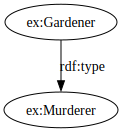

In [19]:
%%rdf turtle
ex:Gardener a ex:Murderer .

as we do not know if the butler tells the truth. But we can reify this triple to make it a statement said by the butler using the properties **rdf:subject, rdf:predicate, rdf:object** and the class **rdf:Statement** which are all terms defined by RDF

**Note: The rdf:type abbreviation "a" can only be used at predicate position. At other positions use rdf:type.**

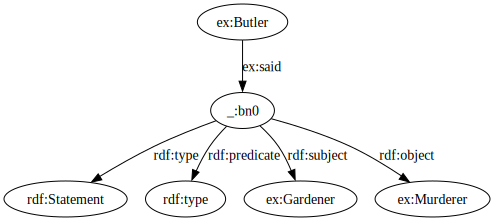

In [22]:
%%rdf turtle

ex:Butler ex:said [  
rdf:subject ex:Gardener ;  
rdf:predicate rdf:type ;  
rdf:object ex:Murderer ;  
a rdf:Statement
] .

## a)  Use nested reification to create a graph of Bob's statement. [2 Points]
A group of friends gossiped: *ObiWan said something interesting: He said that Leia heard that DarthVader is the father of Luke.*

Use the following URIs:  
ObiWan: **http://example.org/#ObiWan**  
Leia: **http://example.org/#Leia**  
DarthVader: **http://example.org/#DarthVader**  
Luke: **http://example.org/#Luke**  
said: **http://example.org/#said**  
heard: **http://example.org/#heard**  
fatherOf: **http://example.org/#fatherOf**  

You may also use all terms from the RDF vocabulary. Please use the CURIEs, which we defined at the very beginning of this notebook.

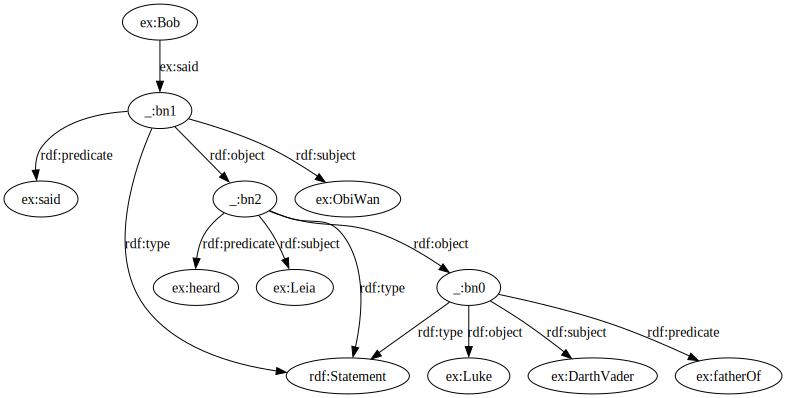

In [29]:
%%rdf turtle -l starwars
# YOUR CODE HERE
@prefix ex: <http://example.org/#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

ex:Bob ex:said [
    rdf:subject ex:ObiWan ;
    rdf:predicate ex:said ;
    rdf:object [
        rdf:subject ex:Leia ;
        rdf:predicate ex:heard ;
        rdf:object [
            rdf:subject ex:DarthVader ;
            rdf:predicate ex:fatherOf ;
            rdf:object ex:Luke ;
            a rdf:Statement
        ] ;
        a rdf:Statement
    ] ;
    a rdf:Statement
] .

In [ ]:
# This test will check whether your graph contains a statement by Bob. [0.5 points]

In [ ]:
# This test will check whether a statement in your graph is about what Eve heard. [0.5 points]

In [ ]:
# This test will check whether the statement of what Eve heard is correct. [1 point]

## Primary values

When using n-ary relations, it sometimes makes sense to have a **primary value**. The address example from the second exercise sheet was an n-ary relation but none of its values (street, house number, zip code, city) could be considered primary. But when talking about the price of somethinge in a specific currency, the price could be considered primary while the currency is a complementing value. To declare a primary value in an n-ary relation, one uses the **rdf:value** property defined in the RDF vocabulary. 

### For example if a cheeseburger costs 1 Euro, you would write:

In [ ]:
%%rdf turtle

ex:Cheeseburger ex:price [  
rdf:value "1" ;  
ex:currency ex:Euro ;  
] .

## b) Use an n-ary relation with primary value to model the following information. [2 Points]

A brewery tries to brew a very special beer with the following details: The level of alcohol is **4.43 %** (use '%' as unit) with a **variation of 0.06** per batch. Because the taste of the beer depends on the temperature , we also need to know the consumption temperature which between **minTemp 6.0** and **maxTemp 8.0**.

Use the following URIs:  
Beer: **http://example.org/#Beer**  
Details: **http://example.org/#details**  
Unit: **http://example.org/#unit**  
Variation: **http://example.org/#variation**  
MinTemp: **http://example.org/#minTemp**  
MaxTemp: **http://example.org/#maxTemp**  

**Note: Use xsd:decimal as datatype for numerical values and omit the datatype for string values. You may also use all terms from the RDF vocabulary.**

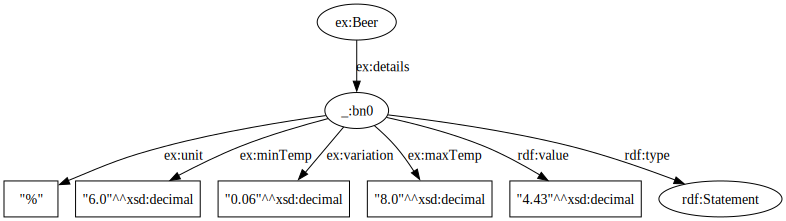

In [31]:
%%rdf turtle -l beer
# YOUR CODE HERE
@prefix ex: <http://example.org/#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:Beer ex:details [
    rdf:value "4.43"^^xsd:decimal ;  # Primary value: Alcohol percentage
    ex:unit "%" ;                    # Unit of alcohol percentage
    ex:variation "0.06"^^xsd:decimal ; # Variation per batch
    ex:minTemp "6.0"^^xsd:decimal ;   # Minimum temperature
    ex:maxTemp "8.0"^^xsd:decimal ;   # Maximum temperature
    a rdf:Statement
] .

In [33]:
# This test will check whether your graph contains the result of the experiment
# and whether the primary value was chosen correctly. [1 point]
store = %rdf -r
g = store['rdfgraphs']['beer']
res = None
res = list(g.objects(subject=uri(ex, "Beer"), predicate=uri(ex, "details")))
x = triple.format(ex+"Beer", ex+"details", "Blank node")
assert len(res) > 0, notContain.format(x)
assert len(res) <= 1, eMultiple.format(x)
assert isinstance(res[0], BNode), eBNode.format(x,res[0].n3())

In [ ]:
 # This test will check whether your graph contains all complementing values. [1 point]
# Only gives points if the last test does not fail.

# Task 2 - RDF Schema [6 Points]

RDF Schema (RDFS) is another [W3C recommended](https://www.w3.org/TR/rdf-schema/) vocabulary. RDFS provides means to specify characteristics of classes and properties independent of their domain. It can be seen as a weak ontology language for defining vocabularies. RDFS splits resources into three types: individuals, classes and properties. Individuals are instances of things, like a specific person or object. Classes are sets of individuals with similar properties like all persons or all cars. Properties describe individuals.

### Classes
Classes are sets of individuals with similar properties. To define our own class, we just have to declare the type of the class resource as **rdfs:Class**:

    ex:Car a rdfs:Class .

To declare that an individual is part of a class, we also use rdf:type:

    ex:BMW a ex:Car .

So rdfs:Class is the class containing all classes.

### Properties
As with classes, we can define our own properties to describe resources. For this, we use the class rdf:Property (Note that it is **rdf:Property** NOT rdfs:Property as it is defined in the RDF vocabulary). To define our own property, we just have to declare the type of the resource as **rdf:Property**:

    ex:drives a rdf:Property .

Then we can use the property:

    ex:Max ex:drives ex:BMW .

As rdf:Property is the class of all properties, it is also an rdfs:Class.

### Subclasses and Subproperties
While classes and properties are a nice way to organize resources, by themselves they do not provide means of infering new information. For this RDFS defines the two properties **rdfs:subClassOf** and **rdfs:subPropertyOf**. Any individual of a subclass also belongs to the superclass and any triple with the subproperty also holds for the superproperty. For example from the following graph:

#### Defining classes and properties

    ex:Car a rdfs:Class .  
    ex:Vehicle a rdfs:Class .  
    ex:drives a rdf:Property .  
    ex:operates a rdf:Property . 

#### Defining subclass- and subproperty-relations  
    
    ex:Car rdfs:subClassOf ex:Vehicle .  
    ex:drives rdfs:subPropertyOf ex:operates .  

#### Facts  
    
    ex:BMW a ex:Car .  
    ex:Max ex:drives ex:BMW .

Then, following triples can be inferred:

    ex:BMW a ex:Vehicle .  
    ex:Max ex:operates ex:BMW .

Both rdfs:subClassOf and rdfs:subPropertyOf are reflexive and transitive. So all \[classes/properties\] are \[subclasses/subproperties\] of themselves and when x is a \[subclass/subproperty\] of y and y is a \[subclass/subproperty\] of z then x is also a \[subclass/subproperty\] of z.

To define that two classes or properties are equal, you just add a subclass/subproperty relation in both directions:

    ex:Car rdfs:subClassOf ex:Automobile .  
    ex:Automobile rdfs:subClassOf ex:Car .  
    ex:drives rdfs:subPropertyOf ex:Steers .  
    ex:Steers rdfs:subPropertyOf ex:drives .

RDFS defines a class rdfs:Resource, which is the superclass of all classes.

### Domains and Ranges
Another way to infer new information is by using property domains and ranges. The domain of a property defines the class of the subject in a triple and the range the class of the object. For this we use the properties **rdfs:domain** and **rdfs:range**. For example, given the graph:

    ex:Car a rdfs:Class .  
    ex:Person a rdfs:Class .  
    ex:drives a rdf:Property .  
    ex:drives rdfs:domain ex:Person .  
    ex:drives rdfs:range ex:Car .  
    ex:Max ex:drives ex:BMW .

we can infer the triples:

    ex:Max a ex:Person .  
    ex:BMW a ex:Car .

Because ex:drives has the domain ex:Person and range ex:Car, ex:Max, who appears as subject of ex:drives, has to be a ex:Person, and ex:BMW, which appears as object of ex:drives, has to be a ex:Car.

Many RDFS properties have predefined domains and ranges. For example rdfs:domain and rdfs:range themselves have rdf:Property as a domain and rdfs:Class as range. This means that we can omit the first three triples in the example above as they can be inferred by the fourth and fifth triple.

Be careful when using multiple domains and ranges as they apply conjunctively and not disjunctively. For example:

    ex:drives rdfs:range ex:Car .  
    ex:drives rdfs:range ex:Ship .

One would think that this means that the object of ex:drives is either a car or a ship but it means that its object is a car and a ship at the same time which is probably unintended. A better way to model this would be the following:

    ex:Car rdfs:subClassOf ex:Vehicle .  
    ex:Ship rdfs:subClassOf ex:Vehicle .  
    ex:drives rdfs:range ex:Vehicle .

### Comparison to Object-Oriented Programming
One may compare the class and property system of RDFS to object-oriented programming but this can be misleading. In oop, one defines classes in terms of what properties they have, while in RDFS one defines properties in terms of which classes of instances they apply to. So instead of saying: "x belongs to class y so it has to have property z", we say "Property z is used with x, so x has to belong to class y".

### Other Useful Properties
RDFS also defines the following useful properties:

rdfs:label: Specifies a human-readable label for a resource. We already used this in prior exercises to give resources literal names.

rdfs:comment: Specifies a human-readable description for a resource.

rdfs:seeAlso: Specifies a generic link. Useful for linking resources to similar resources or resources that provide additional information.

rdfs:isDefinedBy: Relate a resource to its definition. Can be used to indicate a vocabulary in which the resource is defined.

### Entailment
Using the RDFS vocabulary and its rules, we can now rdfs-entail a graph. If graph **A** rdfs-entails graph **B**, every rdfs-interpretation that satisfies graph A also satisfies graph B. With this, we can implicitly deduct semantics for our graphs instead of explicitly specifying the meaning of information. For example, we can describe 'what a car is' without using attributes describing it. We implicitly specify it by stating that a car is a vehicle and that vehicles can be driven. Using this, we can give a machine interpretable meaning to resources and provide a more general description. RDFS-Entailment is only one of many possible entailment regimes. For more information on RDFS-Entailment, other entailment regimes and rdf semantics in general please consult this [W3C recommendation](https://www.w3.org/TR/rdf11-mt/).

## Modelling information about deep learning sources [6 points]

You can learn deep learning from books, research artciles, video lectures, github repos, and self-practices, but let's assume, for the simplicity, books and artciles are two main **sources**. The **creator** of a such a knowledge source is a **person** and only source have a creator. Both books and artcles have an author (well, practically a book or artcile may have more than one authors, but assume just one, for this task) and the author of a book (or an article) is also a creator. Further, only sources have publisher, title, ISBN (or DOI), and a publication date. Now based on these information, create an RDF graph by including following facts: 

   - **Aurelien Geron** is the author of book titled "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow", published by "O'Reilly Media, Inc." on "2019-09-01" and has ISBN "9781492032649". The book has a tagline "Concepts, Tools, and Techniques to Build Intelligent Systems" (i.e., use rdfs:label) and has the description "Source codes and updates can be found on GitHub at https://github.com/ageron/handson-ml2" (i.e., use rdfs:comment)
   - **Rezaul Karim** is the author of book titled "Deep Learning with TensorFlow", published by "Packt Publishing (UK) Ltd." on "2018-03-15" and has ISBN "9781788831109". The book has a tagline "Explore neural networks and build intelligent systems with Python" (i.e., use rdfs:label) and and has the description "Source codes and updates (TensorFlow 2.5.0 compatible) is available on GitHub at https://github.com/PacktPublishing/Deep-Learning-with-TensorFlow-Second-Edition" (i.e., use rdfs:comment) 
   - **Eli Stevens** is the author of book titled "Deep Learning with PyTorch", published by "Manning Publications" on "2020-07-01" and has ISBN "9781617295263"
   - **Sascha Welten** is the author of article titled "DAMS: A Distributed Analytics Metadata Schema", published by "Data Intelligence Journal" on "2021-25-11" and has DOI "10.1162/dint_a_00100". This work is "Supported by German Ministry for Research and Education (BMBF) and was conducted jointly by RWTH Aachen University and Fraunhofer FIT" (i.e., use rdfs:comment)
   - **Wil van der Aalst** is the author of article titled "Data Science in Action", published by "Springer Nature" on "2016-04-16" and has DOI "10.1007/978-3-662-49851-4_1"
   - **Michael Cochez** is the author of article titled "DeepCOVIDExplainer: Explainable COVID-19 Diagnosis from Chest X-ray Images", published by "IEEE International Conference on Bioinformatics and Biomedicine (BIBM'2020)" on "2020-12-16" and has DOI "10.1109/BIBM49941.2020.9313304". This is "One of the earliest works on COVID-19 diagnosis based on biomedical images and already received 75 citations on Google Scholar" (i.e., use rdfs:comment). 

Use the following URIs to model your RDF graph:  

- Source: **http://example.org/#Source**  
- Books: **http://example.org/#Book**  
- Article: **http://example.org/#Article** 

- Person: **http://example.org/#Person**  
- creator: **http://example.org/#createdBy**  
- author: **http://example.org/#authoredBy**  

- title: **http://example.org/#hasTitle**  
- publication date: **http://example.org/#publishedOn**  
- publisher: **http://example.org/#publishedBy**  
- isbn: **http://example.org/#hasISBN**  
- doi: **http://example.org/#hasDOI**  

- Aurelien Geron: **http://example.org/#AurelienGeron**
- Eli Stevens: **http://example.org/#EliStevens**
- Wil van der Aalst: **http://example.org/#WilAalst**
- Rezaul Karim: **http://example.org/#RezaulKarim**  
- Sascha Welten: **http://example.org/#SaschaWelten** 
- Michael Cochez: **http://example.org/#MichaelCochez** 

- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: **http://example.org/#MLTensorFlow**
- Deep Learning with PyTorch: **http://example.org/#DLPyTorch**
- Deep Learning with TensorFlow: **http://example.org/#DLTensorFlow**
- DAMS: A Distributed Analytics Metadata Schema: **http://example.org/#DAMS**
- Data Science in Action: **http://example.org/#DSAction**
- DeepCOVIDExplainer: Explainable COVID-19 Diagnosis from Chest X-ray Images: **http://example.org/#DeepCOVIDExplainer**

You may use all terms from the RDFS vocabulary, but don't specify datatypes of literals. Besides, you may want to abbreviate <http://example.org/#> as ex: 

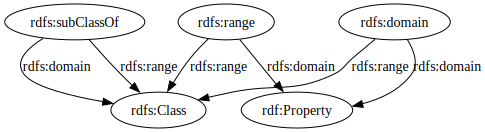

In [53]:
%%rdf turtle -l deep_learning

# These are just some axiomatic triples. Do not remove them.
rdfs:subClassOf rdfs:domain rdfs:Class .
rdfs:subClassOf rdfs:range rdfs:Class .
rdfs:range rdfs:range rdfs:Class .
rdfs:range rdfs:domain rdf:Property .
rdfs:domain rdfs:range rdfs:Class .
rdfs:domain rdfs:domain rdf:Property .

# YOUR CODE HERE



Graphman: Graph labelled 'deep_learning' has been entailed using the RDFS regime.


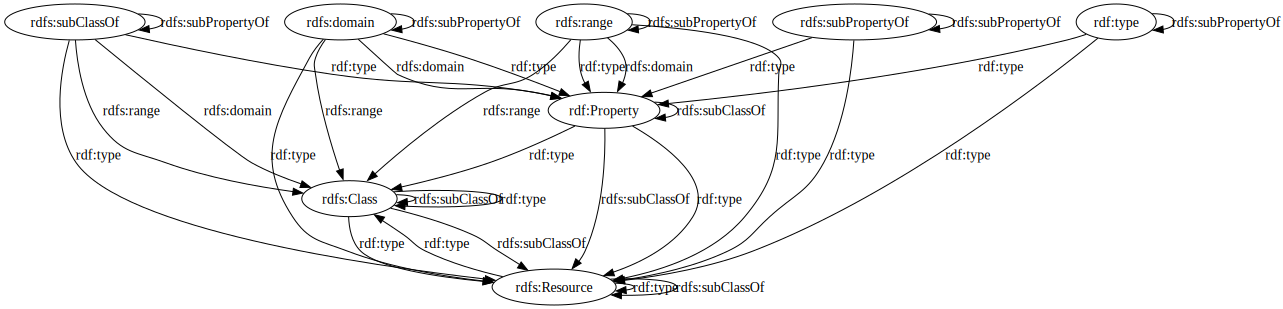

In [55]:
# This cell will compute the closure of the rdfs-entailment of your graph and draw it.
%rdf graph entail-rdfs -l deep_learning
%rdf graph draw -l deep_learning

In [ ]:
# This test will check whether the entailment closure of your graph contains all necessary class and property definitions. [1 point]

In [ ]:
# This test will check whether the entailment closure of your graph contains all necessary subclass and subproperty definitions. [1 point]

In [ ]:
# This test will check whether the entailment closure of your graph contains all necessary range and domain definitions. [1 point]

In [ ]:
# This test will check whether the entailment closure of your graph contains all specified facts. [2 point]

In [ ]:
# This test will check whether the entailment closure of your graph contains provided supplementary facts, e.g., tagline, description, etc. [1 point]